<a href="https://colab.research.google.com/github/varunsande/loan/blob/main/Loan_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: [Link](https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans/data)

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
# For reading our dataset
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# For warnings
import warnings
warnings.filterwarnings(action='ignore')

# Importing necessary packages for building and tuning our model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
# Install and import scikeras for KerasClassifier
!pip install scikeras
from scikeras.wrappers import KerasClassifier # Use scikeras.wrappers instead of tensorflow.keras.wrappers
from keras_tuner.tuners import RandomSearch

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
import gdown

file_id = '14bYaRy8NrRt-C8oNn-L9pkZCrx8I5871'
gdown.download(f'https://drive.google.com/uc?id={file_id}','data.csv', quiet = False)
data = pd.read_csv('data.csv')
print(data.head())



Downloading...
From (original): https://drive.google.com/uc?id=14bYaRy8NrRt-C8oNn-L9pkZCrx8I5871
From (redirected): https://drive.google.com/uc?id=14bYaRy8NrRt-C8oNn-L9pkZCrx8I5871&confirm=t&uuid=09c7ca0a-dcdf-49a4-961e-b9127b79147d
To: /content/data.csv
100%|██████████| 442M/442M [00:08<00:00, 50.1MB/s]


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        Na

In [ ]:
print("Size of dataset -",data.shape)
display(data.head(3))

Size of dataset - (887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

**DATA CLEANING**

In [ ]:
# complete_df.dtypes

In [ ]:
pd.value_counts(df.loan_status).to_frame().reset_index() # Changed complete_df to df

,loan_status,count
0,Current,601779
1,Fully Paid,207723
2,Charged Off,45248
3,Late (31-120 days),11591
4,Issued,8460
5,In Grace Period,6253
6,Late (16-30 days),2357
7,Does not meet the credit policy. Status:Fully ...,1988
8,Default,1219
9,Does not meet the credit policy. Status:Charge...,761


In [ ]:
# In ipython-input-54-cd86249b692a
# Assuming 'data' is your original DataFrame,
# and you intended to use a copy of it as 'complete_df'
complete_df = data.copy() # Define complete_df by making a copy of your original data

drop_df = complete_df
drop_df = complete_df[~complete_df['loan_status'].isin(['Current', 'Issued',
                                #  'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
                                # 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'
                                                           ])]

In [ ]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) #改
    return missing_values

def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values':input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] > 0].sort_values(by='#Count', ascending=False)

    return missing_values

# Finding the the count and percentage of values that are missing.
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
dti_joint,277134,99.997835,float64
annual_inc_joint,277134,99.997835,float64
verification_status_joint,277134,99.997835,object
il_util,276939,99.927473,float64
mths_since_rcnt_il,276918,99.919896,float64
total_cu_tl,276914,99.918453,float64
inq_fi,276914,99.918453,float64
all_util,276914,99.918453,float64
max_bal_bc,276914,99.918453,float64
open_rv_24m,276914,99.918453,float64


In [ ]:
#drop any columns where over a certain percentage is missing
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
desc,184482,66.566356,object
mths_since_last_delinq,151930,54.820668,float64
total_rev_hi_lim,66689,24.063289,float64
tot_cur_bal,66689,24.063289,float64
tot_coll_amt,66689,24.063289,float64
emp_title,15392,5.553872,object
emp_length,11101,4.005557,object
last_pymnt_d,921,0.332323,object
revol_util,253,0.091290,float64
collections_12_mths_ex_med,145,0.052320,float64


'loan_condition' is not present in the DataFrame.


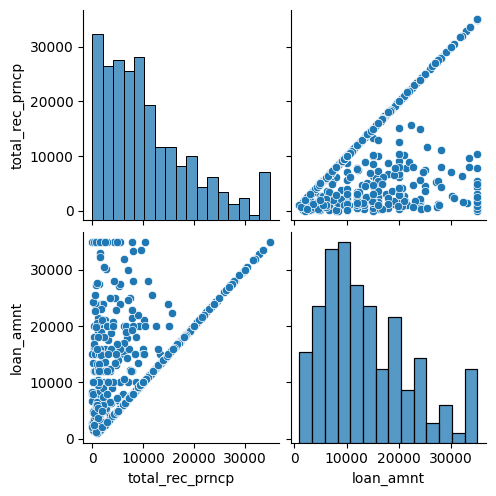

In [ ]:
# Before dropping columns, check if 'loan_condition' is present and its missing value percentage
missing_stats = get_missing_value_stats(drop_df)

if 'loan_condition' in missing_stats.index:
    missing_percent = missing_stats.loc['loan_condition', 'Missing Percent']
    print(f"'loan_condition' missing percentage: {missing_percent:.2f}%")
    if missing_percent > 20:  # Adjust threshold if needed
        print("'loan_condition' will be dropped due to high missing percentage.")
        # Instead of dropping, consider imputing or excluding from pairplot
        # For example, to impute with the most frequent value:
        # drop_df['loan_condition'] = drop_df['loan_condition'].fillna(drop_df['loan_condition'].mode()[0])
        # Or, if you still want to drop it, exclude it from the pairplot columns:
        pairplot_cols = ['total_rec_prncp', 'loan_amnt'] # Exclude 'loan_condition'
    else:
        pairplot_cols = ['total_rec_prncp', 'loan_condition', 'loan_amnt']
else:
    print("'loan_condition' is not present in the DataFrame.")
    pairplot_cols = ['total_rec_prncp', 'loan_amnt'] # Exclude 'loan_condition'


# Proceed with dropping columns as before (or adjust your dropping strategy)
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))

# Now the pairplot should work if 'loan_condition' was handled appropriately
sns.pairplot(drop_df[pairplot_cols].sample(n=1000, random_state=42), hue='loan_condition' if 'loan_condition' in pairplot_cols else None)

In [ ]:
direct_indicators = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

drop_df.drop(direct_indicators, axis=1, inplace=True)

In [ ]:
#drop repeated features
# drop_df.drop(['loan_condition'], axis=1, inplace=True)
# drop_df.drop(['loan_status'], axis=1, inplace=True)
drop_df.drop(['emp_length'], axis=1, inplace=True)

drop_df.drop(['id','emp_title','url','title','zip_code'], axis=1, inplace=True)

# unique values a categorical variable (object) has
drop_df.select_dtypes(include=["object"]).nunique()  #include/exclude

,0
term,2
grade,7
sub_grade,35
home_ownership,6
verification_status,3
issue_d,103
loan_status,8
pymnt_plan,2
desc,91908
purpose,14


In [ ]:
#reduce the data size to fasten following steps, otherwise the memory will soon run out
# Adjust the sample size to be less than or equal to the DataFrame size
complete_df = df.sample(n=min(100000, len(df)), random_state=42)
# Or, if you want all rows, simply assign:
# complete_df = df

In [ ]:
import numpy as np

df = data.copy()
df.info()
# Add necessary variables
# Determining the loans that are bad from loan_status column --dependent variable (y)
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
complete_df['loan_condition_int'] = complete_df['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)
complete_df['loan_condition'] = np.where(complete_df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

#emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
complete_df['emp_length_int'] = complete_df['emp_length'].map(emp_length_mapping)
complete_df.head().transpose()

# region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
complete_df['region'] = complete_df['addr_state'].map(state_to_region)
complete_df.head().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

,550946,292628,739899,302859,653323
id,63398958,27610673,49925091,28102260,57324697
member_id,67740818,30113747,53293877,30615399,61027428
loan_amnt,8000.0,21000.0,19725.0,8000.0,35000.0
funded_amnt,8000.0,21000.0,19725.0,8000.0,35000.0
funded_amnt_inv,8000.0,21000.0,19725.0,8000.0,34875.0
...,...,...,...,...,...
inq_last_12m,NaN,NaN,NaN,NaN,NaN
loan_condition_int,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan
emp_length_int,8.0,3.0,10.0,9.0,10.0


**EDA AUTOMATION**

In [ ]:
EDA_df = complete_df.copy()

EDA_cat_columns = EDA_df.select_dtypes(include=['object']).columns.tolist()
EDA_num_columns = EDA_df.select_dtypes(exclude=['object']).columns.tolist()

# Filter categorical columns with unique value count less than or equal to the specified threshold.
filtered_EDA_cat_columns = [col for col in EDA_cat_columns if EDA_df[col].nunique() <= 50]


In [ ]:
def plot_variable_distribution(dataframe, variable_name):
    if dataframe[variable_name].dtype == 'object':
        # Categorical variables, draw a histogram
        sns.countplot(x=variable_name, data=dataframe)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {variable_name}')
    else:
        # Numeric variables, plot histograms
        sns.histplot(dataframe[variable_name], kde=True)
        plt.xlabel(variable_name)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {variable_name}')
    plt.show()

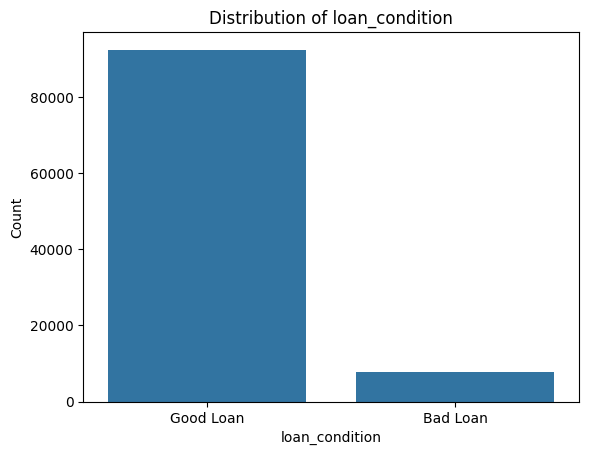

In [ ]:
variable = "loan_condition" # @param ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'loan_condition_int', 'loan_condition', 'emp_length_int', 'region'] {allow-input: true}
plot_variable_distribution(EDA_df, variable)

**Missing Value Imputation**

In [ ]:
# for other, fill in with zero
df.fillna(0, inplace=True)
df.isnull().sum().max() # Maximum number of nulls.

0

In [ ]:
# Assuming fillna_df is your DataFrame

# Define the bad_loan categories
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]

# Create 'loan_condition_int' using numpy.where
df['loan_condition_int'] = np.where(df['loan_status'].isin(bad_loan), 1, 0)

# Check the distribution of values
print(df['loan_condition_int'].value_counts())

loan_condition_int
0    819950
1     67429
Name: count, dtype: int64


In [ ]:
# Calculate percentage distribution
loan_condition_percentage = df['loan_condition_int'].value_counts(normalize=True) * 100

# Display the percentages
print(loan_condition_percentage)

loan_condition_int
0    92.40133
1     7.59867
Name: proportion, dtype: float64


**Removing Outliers**

In [ ]:
#Custom thresholds
RemoveOutlier_df = df.copy()
print("Dataset before removing outlier:",RemoveOutlier_df.shape)
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['annual_inc'] <= 250000]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['dti'] <= 50]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['open_acc'] <= 40]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['total_acc'] <= 80]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_util'] <= 120]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_bal'] <= 250000]
RemoveOutlier_df.reset_index(drop=True, inplace=True)
print("Dataset after removing outlier:",RemoveOutlier_df.shape)

RemoveOutlier_df.head().transpose()

Dataset before removing outlier: (887379, 75)
Dataset after removing outlier: (877533, 75)


,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
...,...,...,...,...,...
total_rev_hi_lim,0.0,0.0,0.0,0.0,0.0
inq_fi,0.0,0.0,0.0,0.0,0.0
total_cu_tl,0.0,0.0,0.0,0.0,0.0
inq_last_12m,0.0,0.0,0.0,0.0,0.0


**Correlation Analysis**

In [ ]:
target_col = target_variable = "loan_condition_int"

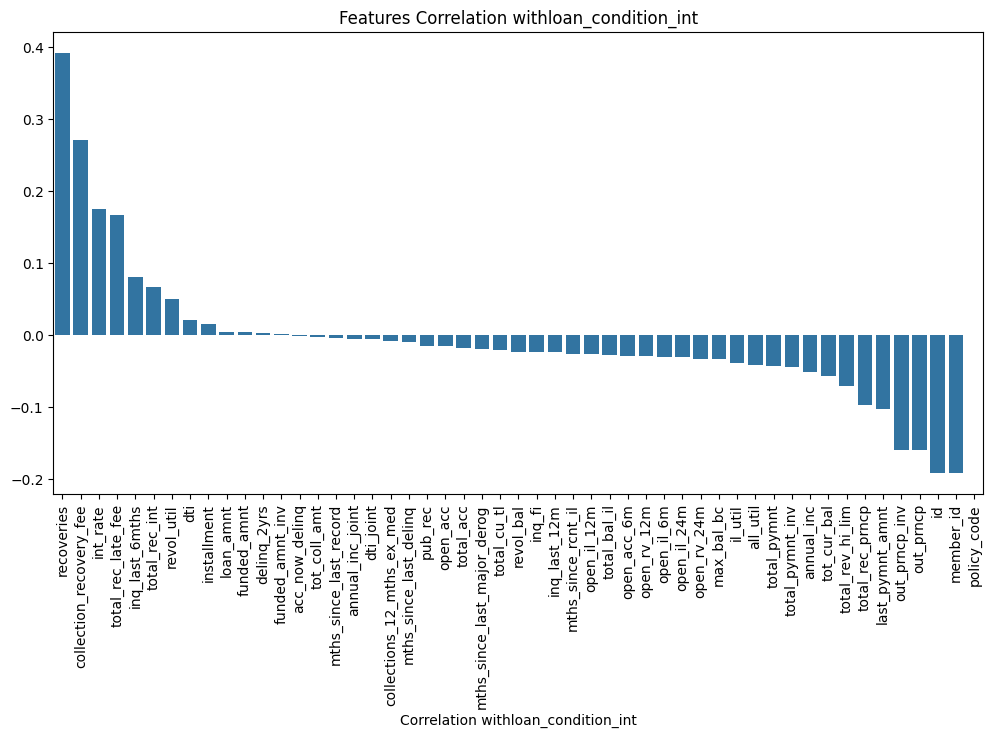

recoveries                     0.392219
collection_recovery_fee        0.270894
int_rate                       0.175512
total_rec_late_fee             0.166799
inq_last_6mths                 0.081099
total_rec_int                  0.067686
revol_util                     0.050159
dti                            0.021026
installment                    0.015587
loan_amnt                      0.004911
funded_amnt                    0.004217
delinq_2yrs                    0.002795
funded_amnt_inv                0.001470
acc_now_delinq                -0.000065
tot_coll_amt                  -0.002082
mths_since_last_record        -0.003851
annual_inc_joint              -0.005472
dti_joint                     -0.005571
collections_12_mths_ex_med    -0.007064
mths_since_last_delinq        -0.009390
pub_rec                       -0.014163
open_acc                      -0.015298
total_acc                     -0.017026
mths_since_last_major_derog   -0.018225
total_cu_tl                   -0.020349


In [ ]:
corr_df = RemoveOutlier_df.copy()

# correlation with y
correlation_with_loan_condition = corr_df.select_dtypes(include=['int64', 'float64']).corr()[target_variable]
sorted_correlation = correlation_with_loan_condition.drop(target_variable).sort_values(ascending=False)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, orient='v')
plt.xlabel('Correlation with{}'.format(target_variable))
plt.title('Features Correlation with{}'.format(target_variable))
plt.xticks(rotation=90)
plt.show()
print(sorted_correlation)

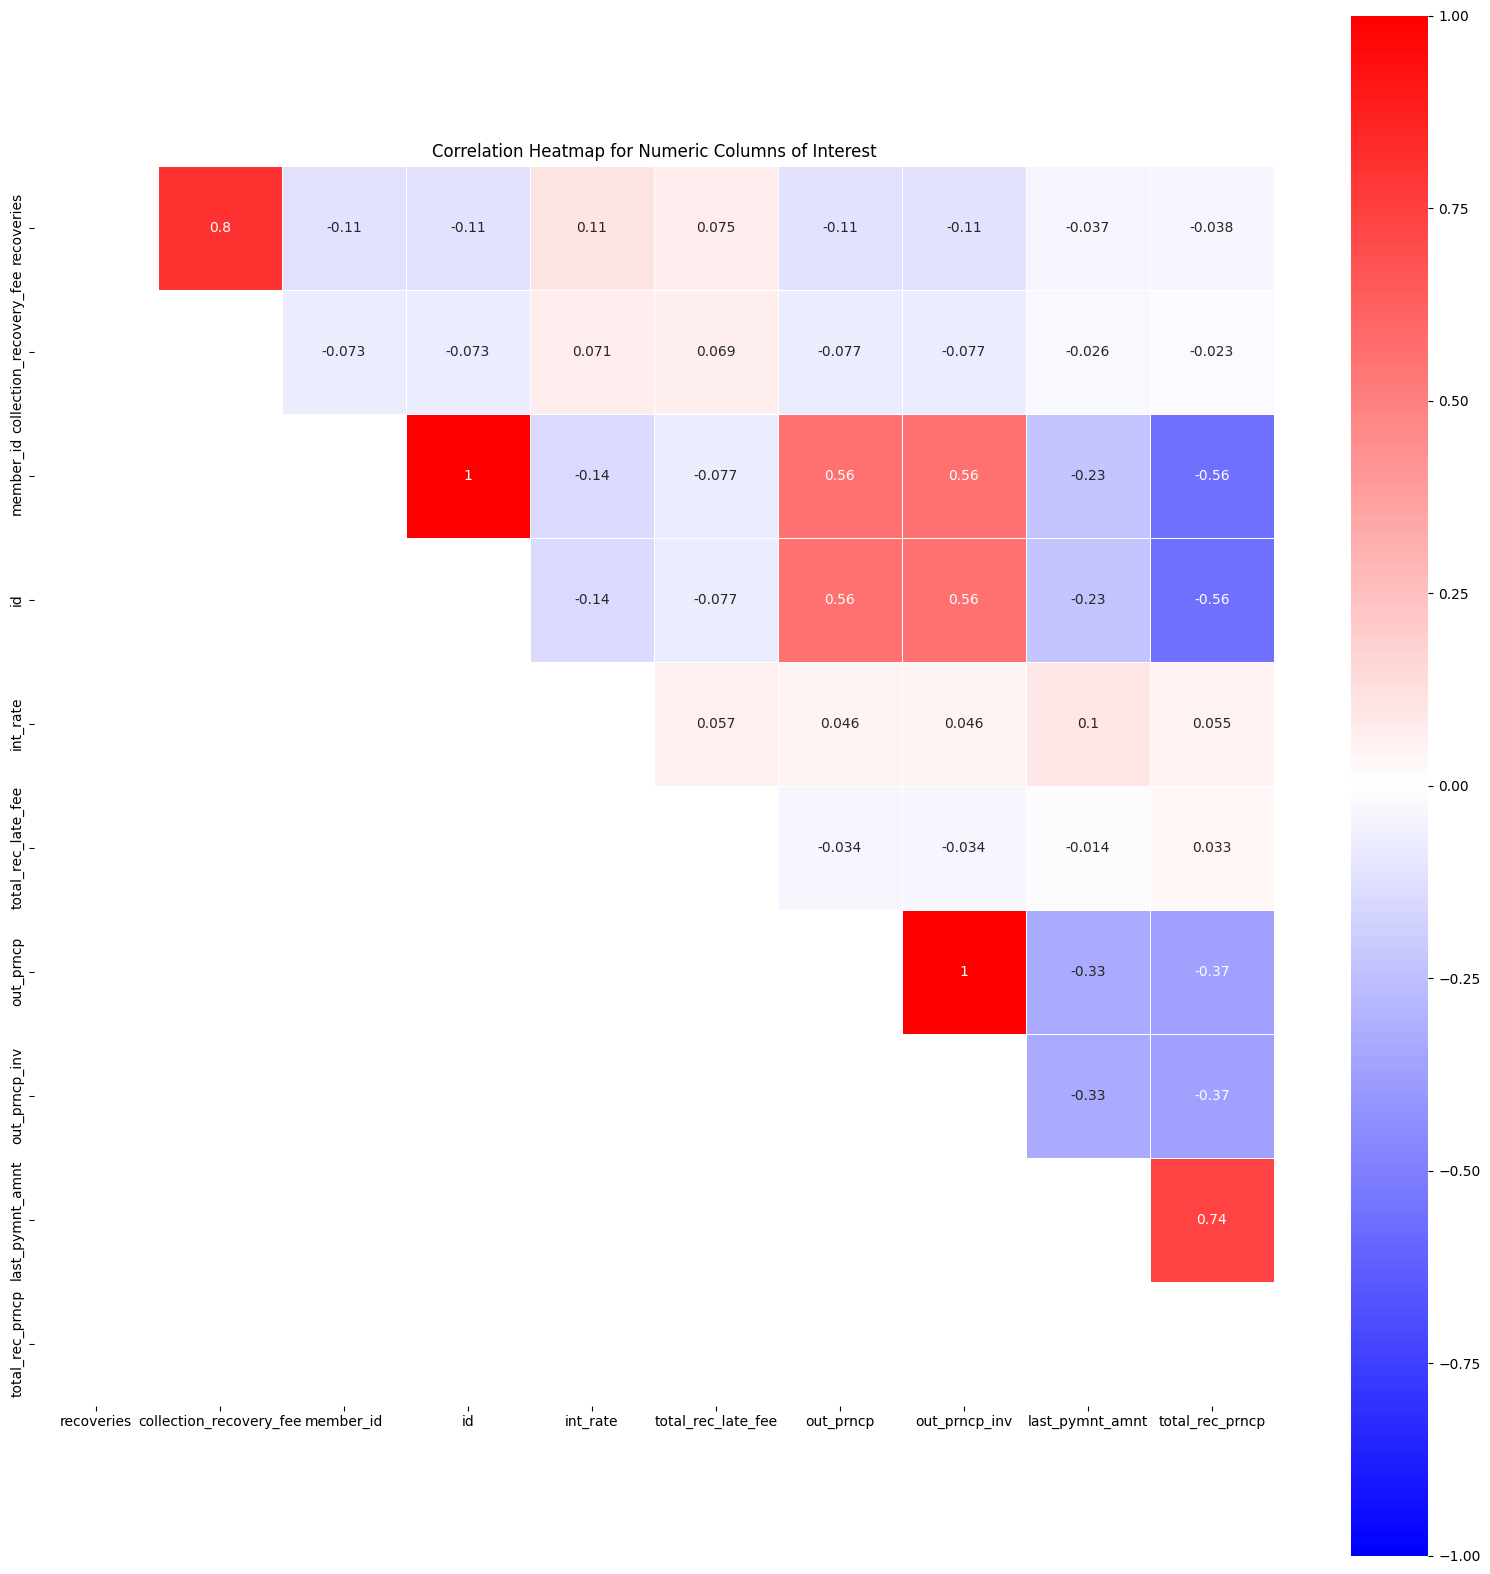

In [ ]:
# Select the variables with the highest correlation with the dependent variable and explore the correlation between them
top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

plt.figure(figsize=(20, 20))
correlation_matrix = RemoveOutlier_df[top_variables].corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=-1, vmax=1, square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Numeric Columns of Interest')
plt.show()


**Feature Engineering**

In [ ]:
TE_df = RemoveOutlier_df.copy()

In [ ]:
# divide variables into numerical variables and categorical variables, categorical variables are divided into binary variables and multivariate variables
original_cols = TE_df.columns

cat_cols = TE_df.select_dtypes(include=['object']).columns.tolist()
num_cols = [col for col in TE_df.select_dtypes(exclude=['object']).columns.tolist() if col not in ['id', 'loan_condition_int']]

dual_cat_cols = [col for col in cat_cols if TE_df[col].nunique()<=2]
multi_cat_cols =[col for col in cat_cols if TE_df[col].nunique()>2]

multi_cat_cols

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'verification_status_joint']

**Binary Encoding for Binary variables**

In [ ]:
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols

# binary encoding for dual_cat_cols
TE_df = pd.get_dummies(TE_df, columns=dual_cat_cols, drop_first=True)

# update dual_cat_cols
changed_columns = [col for col in TE_df.columns if col not in original_cols]
dual_cat_cols = changed_columns

TE_df.head().transpose()


,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
...,...,...,...,...,...
loan_condition_int,0,1,0,0,0
term_ 60 months,False,True,False,False,True
pymnt_plan_y,False,False,False,False,False
initial_list_status_w,False,False,False,False,False


**Train Test Split**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Specify test_size to account for 20%

for train_set, test_set in stratified.split(TE_df, TE_df[target_col]):
    stratified_train = TE_df.loc[train_set]
    stratified_test = TE_df.loc[test_set]

train_df = stratified_train
test_df = stratified_test

# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

print(train_df[target_col].value_counts()/len(TE_df))
print(test_df[target_col].value_counts()/len(TE_df))
train_df.shape

loan_condition_int
0    0.738957
1    0.061043
Name: count, dtype: float64
loan_condition_int
0    0.184739
1    0.015261
Name: count, dtype: float64


(702026, 75)

In [ ]:
# separates the y(target variables) and X(features) for the training and testing datasets

train_y = train_df[[target_col]]
test_y = test_df[[target_col]]

train_X = train_df.drop(target_col, axis=1, inplace=False)
test_X = test_df.drop(target_col, axis=1, inplace=False)

train_X.shape

(702026, 74)

**Target Encoding for Multicategorical Variables**

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

# Create a data set containing only multi-categorical variables
multi_cat_train_X = train_X[multi_cat_cols]
multi_cat_test_X = test_X[multi_cat_cols]

# Target encode categorical variables with smoothing method (on train set)
encoder = TargetEncoder(smoothing=0.2)
encoder.fit(multi_cat_train_X, train_y)

# Apply the same encoding rules on train and test set
encoded_multi_cat_train_X = encoder.transform(multi_cat_train_X)
encoded_multi_cat_test_X = encoder.transform(multi_cat_test_X)

encoded_train_X = pd.concat([train_X.drop(columns=multi_cat_cols), encoded_multi_cat_train_X], axis=1)
encoded_test_X = pd.concat([test_X.drop(columns=multi_cat_cols), encoded_multi_cat_test_X], axis=1)

encoded_train_X.head().transpose()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.9 MB/s eta 0:00:00


,0,1,2,3,4
id,66666342,20771549,55229835,61538922,1445362
member_id,71449089,23044095,58810594,65657663,1697774
loan_amnt,20000.0,22000.0,21000.0,5400.0,19425.0
funded_amnt,20000.0,22000.0,21000.0,5400.0,19425.0
funded_amnt_inv,20000.0,22000.0,21000.0,5400.0,19425.0
...,...,...,...,...,...
earliest_cr_line,0.07348,0.063218,0.083554,0.084593,0.076239
last_pymnt_d,0.005615,0.054157,0.005615,0.005615,0.214752
next_pymnt_d,0.035147,0.035147,0.035147,0.035147,0.179104
last_credit_pull_d,0.056736,0.056736,0.056736,0.056736,0.056736


**Normalization for Numeric Variables**

In [ ]:
!pip install scikit-learn # Install scikit-learn if not already installed
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()

# Fit and apply normalization on the training set
standardized_train_X = encoded_train_X.copy()
standardized_train_X[num_cols] = scaler.fit_transform(encoded_train_X[num_cols])

# Apply the same normalization rules on the test set
standardized_test_X = encoded_test_X.copy()
standardized_test_X[num_cols] = scaler.transform(encoded_test_X[num_cols])

standardized_train_X.head().transpose()

,0,1,2,3,4
id,66666342,20771549,55229835,61538922,1445362
member_id,1.513999,-0.49313,0.98994,1.273856,-1.378262
loan_amnt,0.640752,0.87994,0.760346,-1.105318,0.571986
funded_amnt,0.642798,0.882152,0.762475,-1.104488,0.573983
funded_amnt_inv,0.64652,0.885533,0.766027,-1.09828,0.577803
...,...,...,...,...,...
earliest_cr_line,0.07348,0.063218,0.083554,0.084593,0.076239
last_pymnt_d,0.005615,0.054157,0.005615,0.005615,0.214752
next_pymnt_d,0.035147,0.035147,0.035147,0.035147,0.179104
last_credit_pull_d,0.056736,0.056736,0.056736,0.056736,0.056736


**Feature Selection**

In [ ]:
!pip install scikit-learn # Install scikit-learn if not already installed
from sklearn.feature_selection import VarianceThreshold # Import VarianceThreshold

# Assuming 'standardized_train_X' is your original standardized data
# and you need to undersample it:

# Import necessary library for undersampling if not already imported
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the undersampler
undersampler = RandomUnderSampler(random_state=42) # You can adjust random_state

# Perform undersampling on your standardized data
standardized_train_X_undersample, y_undersampled = undersampler.fit_resample(standardized_train_X, train_y) # Assuming 'train_y' is your target variable


selector = VarianceThreshold(threshold=1)
selector.fit(standardized_train_X_undersample)

filtered_feature_names = standardized_train_X_undersample.columns[selector.get_support()]
standardized_train_X_undersample_filtered = standardized_train_X_undersample[filtered_feature_names]

standardized_train_X_undersample_filtered.shape

(107134, 12)

In [ ]:
vars_final = ['delinq_2yrs',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'open_acc_6m',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'all_util']


In [ ]:
# Use wrapper to reduce variables
wrapped_train_X = standardized_train_X_undersample_filtered.filter(vars_final, axis=1)
wrapped_test_X = standardized_test_X.filter(vars_final, axis=1)


print("final train/test X shape (target encoded):", wrapped_train_X.shape, wrapped_test_X.shape)
print("final train/test y shape:", train_y.shape, test_y.shape)

final train/test X shape (target encoded): (107134, 0) (175507, 7)
final train/test y shape: (702026, 1) (175507, 1)


In [ ]:
wrapped_train_X.head()

""
559803
182717
62927
368468
35892


**Model Building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(mean_conf_matrix, xtick_labels=None, ytick_labels=None):
    fig, axes = plt.subplots(figsize=(8, 6))
    default_style = sns.axes_style()
    # sns.set(font_scale=1.5)
    ax = sns.heatmap(mean_conf_matrix.T, annot=True, cmap='Blues', fmt=".1f",annot_kws={"size": 18})
    if xtick_labels:
        ax.set_xticklabels(xtick_labels)
    if ytick_labels:
        ax.set_yticklabels(ytick_labels)


    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')
    plt.title('Mean Confusion Matrix')
    sns.set_style(default_style)
    plt.show()

def calculate_scores(model, X_trn, y_trn, X_tst, y_tst):
    """Calculate various classification scores on the test set"""
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_tst, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_tst, y_pred)
    recall = recall_score(y_tst, y_pred)
    f1 = f1_score(y_tst, y_pred)

    y_pred_proba = model.predict_proba(X_tst)[:,1]
    auc = roc_auc_score(y_tst, y_pred_proba)

    mask = y_tst['loan_condition_int'].astype(bool).values
    churn = y_pred_proba[mask]
    not_churn = y_pred_proba[~mask]
    ks = sps.ks_2samp(churn, not_churn)[0]

    return accuracy, auc, ks, conf_matrix, precision, recall, f1

def fit_first_level(models, X_trn, y_trn, X_tst):
    """
    Prepare first-level model fitting for stacking. Only used during model stacking.
    Output the predicted probabilities of the first-level models as features for the stacking model.
    """
    # Create dataframes to store predictions of the first-level models
    X2_trn = np.zeros((len(X_trn), 2 * len(models)))
    X2_tst = np.zeros((len(X_tst), 2 * len(models)))

    for i, model in enumerate(models.values()):
        print("Stacking with", model)

        model.fit(X_trn, y_trn)
        y_trn_pred_proba = model.predict_proba(X_trn)
        y_tst_pred_proba = model.predict_proba(X_tst)

        X2_trn[:, i*2:(i+1)*2] = y_trn_pred_proba
        X2_tst[:, i*2:(i+1)*2] = y_tst_pred_proba

    return X2_trn, X2_tst

def calculate_cv_scores(model, X, y, cv=5, stacking=False, models=None, verbose=False):
    """Calculate average k-fold cross-validated classification scores"""
    kf = KFold(n_splits=cv, shuffle=True)
    accuracy_scores = []
    auc_scores = []
    ks_scores = []
    conf_matrices = []  # Store confusion matrices for each fold
    precision_scores = []
    recall_scores = []
    f1_scores = []
    fold_count = 0

    for train_index, test_index in kf.split(X):
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]

        if stacking:
            # smote = False
            X_trn, X_tst = fit_first_level(models, X_trn, y_trn, X_tst)

        accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(model, X_trn, y_trn, X_tst, y_tst)
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        ks_scores.append(ks)
        conf_matrices.append(conf_matrix)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # if verbose:
        #     print(f"Fold {fold_count} accuracy, auc, ks:", accuracy, auc, ks)

        fold_count += 1

    # mean confusion matrix
    mean_conf_matrix = np.mean(conf_matrices, axis=0) #/ np.sum(np.mean(conf_matrices, axis=0)))
    print(f"Mean Confusion Matrix for Model:\n", mean_conf_matrix)
    plot_confusion_matrix(mean_conf_matrix, xtick_labels=['Good Loan', 'Bad Loan'], ytick_labels=['Good Loan', 'Bad Loan'])

    return np.mean(accuracy_scores), np.mean(auc_scores), np.mean(ks_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)

def fit_models_summary(models, X, y, cv=5, smote = False,undersample = False):
    """
    Calculate average k-fold cross-validated classification scores for multiple models.
    Generate a summary dataframe.
    """
    baseline = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

    for name, model in models.items():
        # accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv, smote=False)
        # baseline.loc[name] = [accuracy, auc, ks, None, precision, recall, f1]

        accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv)

        if smote:
            baseline.loc["{} (SMOTE)".format(name)] = [accuracy, auc, ks, precision, recall, f1]
        if undersample:
            baseline.loc["{} (undersample)".format(name)] = [accuracy, auc, ks, precision, recall, f1]

        print(f"{name} processed")

    return baseline

In [ ]:
!pip install scipy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
import scipy.stats as sps

In [ ]:
mss=60
msl=int(mss/2)

models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
     'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10)),
# #     'Support Vector Machine': SVC()
}

**Model Bagging and Stacking**

In [ ]:
models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
    #  'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
    #  'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10))
}

**Model Evaluation on Test Set**

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
def calculate_ks(y_true, y_score):
    """Calculates the Kolmogorov-Smirnov statistic."""
    # Convert y_true to a 1-dimensional array if it's a DataFrame
    y_true = y_true.values.ravel()

    # If y_score is 1-dimensional, reshape it to 2-dimensional
    if y_score.ndim == 1:
        y_score = y_score.reshape(-1, 1)

performance_df = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])
bagging_models = {}

for name, model in models.items():
    print(f"Processing: {name}")
    bagging_model = BaggingClassifier(estimator=model, n_estimators=10, random_state=42)

    # Check for any shape mismatches
    print(f"Shape of wrapped_train_X: {wrapped_train_X.shape}, Shape of train_y: {train_y.shape}")

    # Ensure wrapped_train_X and train_y have the same number of samples
    # Assuming wrapped_train_X is a subset of the original training data
    # and the index of wrapped_train_X corresponds to the index of train_y
    train_y_subset = train_y.loc[wrapped_train_X.index]

    # Fit model and evaluate using the subset of train_y
    bagging_model.fit(wrapped_train_X, train_y_subset.values.ravel()) #.values.ravel() added to fix DataConversionWarning
    bagging_models[f"{name}_bagging"] = bagging_model

    # **Get the common features between training and testing sets**
    common_features = list(set(wrapped_train_X.columns) & set(wrapped_test_X.columns))

    # **Select only common features for both training and testing data**
    wrapped_train_X_subset = wrapped_train_X[common_features]
    wrapped_test_X_subset = wrapped_test_X[common_features]

    scores = calculate_scores(bagging_model, wrapped_train_X_subset, train_y_subset, wrapped_test_X_subset, test_y) # train_y_subset added to provide consistent number of samples
    performance_df.loc[f"{name} (bagging)"] = dict(zip(performance_df.columns, scores))

performance_df

Processing: Logistic Regression
Shape of wrapped_train_X: (107134, 7), Shape of train_y: (702026, 1)
Processing: Decision Tree
Shape of wrapped_train_X: (107134, 7), Shape of train_y: (702026, 1)
Processing: Random Forest
Shape of wrapped_train_X: (107134, 7), Shape of train_y: (702026, 1)
Processing: Light GBM
Shape of wrapped_train_X: (107134, 7), Shape of train_y: (702026, 1)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 53567, number of negative: 53567
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 107134, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498861 -> initscore=-0.004555
[LightGBM] [Info] Start training from score -0.004555
[LightGBM] [Warning] Stopped training because there are no more leaves 

,accuracy,auc,ks,precision,recall,f1
Logistic Regression (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
Decision Tree (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
Random Forest (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
Light GBM (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
XGBoost (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
Gradient Boosting (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
Neural Network (bagging),0.076305,0.5,None,0.076305,1.0,0.14179
